<a href="https://colab.research.google.com/github/bharathkumar426/ml/blob/main/ML(linear%20regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
 import pandas as pd
 import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
idf=pd.DataFrame(data=iris.data,columns=iris.feature_names)
idf['target']=iris.target

In [4]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
idf.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [6]:
x = idf.drop('target', axis=1)
y = idf['target']

In [7]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
lrpred=lr.predict(x_test_scaled)

<Axes: xlabel='target'>

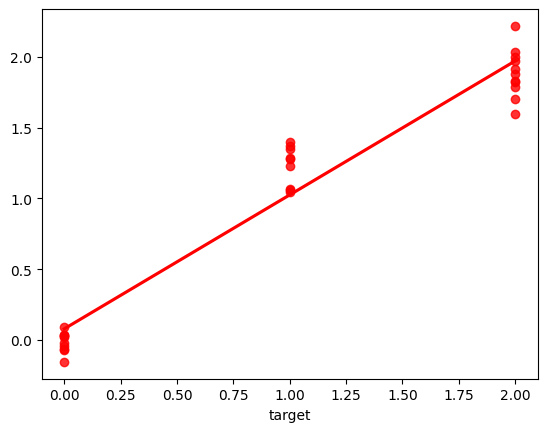

In [13]:
sns.regplot(x=y_test,y=lrpred,ci=None,color='red')

Text(0.5, 1.0, 'Distribution of y_test')

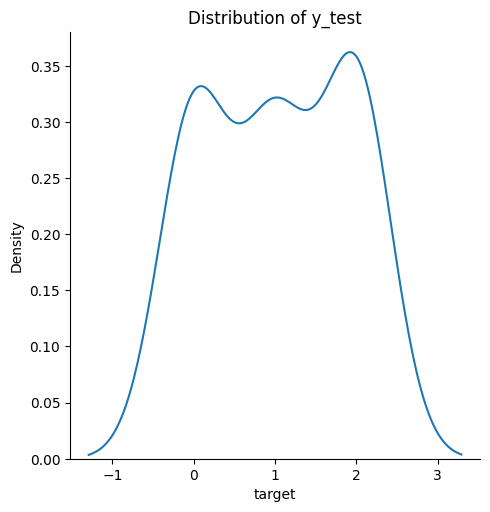

In [21]:
sns.displot(y_test,kind="kde")
plt.title("Distribution of y_test")

<Axes: ylabel='target'>

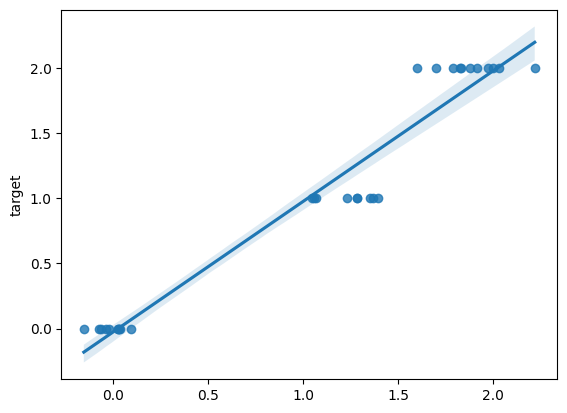

In [23]:
sns.regplot(x=lrpred,y=y_test)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lrpred))
print(mean_absolute_error(y_test,lrpred))

0.037113794407976894
0.14637694965308537


In [25]:
#Check the accuracy of the data
from sklearn.metrics import r2_score
r2_score(y_test,lrpred)

0.9468960016420045